Code taken from gym-anytrading and sarsa code implemented for the previous assignment.
The code is not suitable for this assignment as it uses a tabular approach, which is not desirable

In [1]:
#use gym and gym-anytrading to train an agent to trade forex
#use sarsa algorithm to train the agent to trade
#use the trained agent to trade

"""A long position implies that the trader expects the price of the asset to increase. 
The position implying that buying the asset with the anticipation that the asset's price will increase.
A short position  means the trader expects the price to decrease.When the agent takes a short position, it's selling the asset
The starting position of the environment is always Short"""

import gym
import gym_anytrading
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
import time
from collections import deque
import warnings
from collections import defaultdict

warnings.filterwarnings('ignore')


custom_env information:
> shape: (10, 2)
> df.shape: (6225, 5)
> prices.shape: (300,)
> signal_features.shape: (300, 2)
> max_possible_profit: 1.1229001800089833


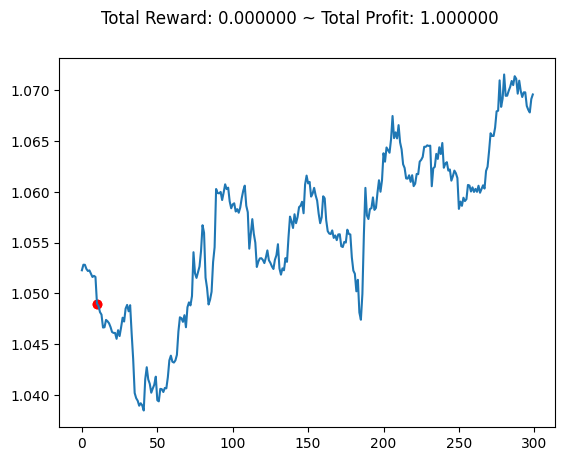

In [2]:
#set the enviroment
custom_env = gym.make('forex-v0',
               df = FOREX_EURUSD_1H_ASK,
               window_size = 10,
               frame_bound = (10, 300),
               unit_side = 'right')

print()
print("custom_env information:")
print("> shape:", custom_env.shape)
print("> df.shape:", custom_env.df.shape)
print("> prices.shape:", custom_env.prices.shape)
print("> signal_features.shape:", custom_env.signal_features.shape)
print("> max_possible_profit:", custom_env.max_possible_profit())

#plot the enviroment
custom_env.reset()
custom_env.render()


In [3]:
#sarsa algorithm to train the agent

custom_env = gym.make('forex-v0',
               df = FOREX_EURUSD_1H_ASK,
               window_size = 10,
               frame_bound = (10, 300),
               unit_side = 'right')

# Define the racetrack environment and other parameters
env = custom_env
num_agents = 20
num_episodes = 1000
alpha = 0.4
gamma = 0.9
epsilon = 0.15
sarsa_rewards = []
num_actions = 2 #buy and sell are the two actions

# Function to choose an action epsilon-greedily
def epsilon_greedy_policy_sarsa(Q, state, epsilon, num_actions):
    state_key = state.tostring() 
    
    if np.random.uniform(0, 1) < epsilon or state_key not in Q:
        return env.action_space.sample()  # Choose a random action
    else:
        return np.argmax(Q[state_key])  # Choose the action with maximum action value

# Function to update the action-value function using Sarsa
def update_Q_sarsa(state, action, reward, next_state, next_action, Q, alpha, gamma):
    state_key = state.tostring()
    next_state_key = next_state.tostring()
    
    td_target = reward + gamma * Q[next_state_key][next_action]
    td_error = td_target - Q[state_key][action]
    Q[state_key][action] += alpha * td_error

# Initialize action-value function
Q_sarsa = defaultdict(lambda: np.zeros(num_actions))

# Train the agent for the specified number of episodes
for _ in range(num_episodes):
    state = env.reset()
    action = epsilon_greedy_policy_sarsa(Q_sarsa, state, epsilon, num_actions)
    episode_reward = 0
    done = False

    # Loop until the episode is complete
    while not done:
        next_state, reward, done, _ = env.step(action)
        next_action = epsilon_greedy_policy_sarsa(Q_sarsa, next_state, epsilon, num_actions)
        
        # Update the action-value function using the Sarsa update rule
        update_Q_sarsa(state, action, reward, next_state, next_action, Q_sarsa, alpha, gamma)

        # Update the current state and action
        state = next_state
        action = next_action
        episode_reward += reward

    sarsa_rewards.append(episode_reward)


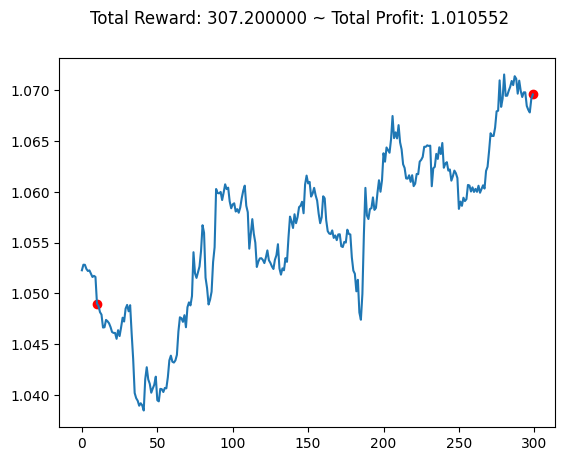

In [4]:
#rending the performance of the portfolio at the end of the episode

custom_env.render()

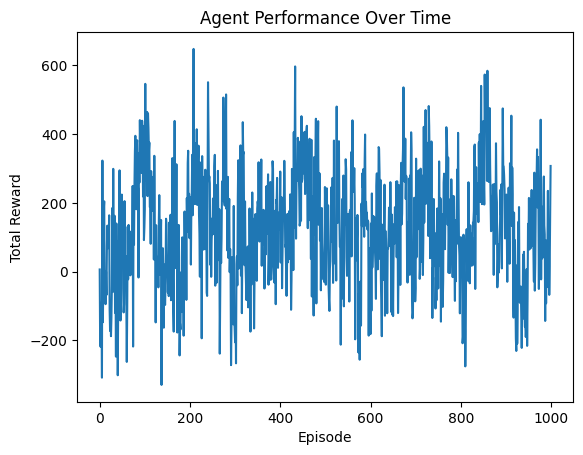

In [5]:
import matplotlib.pyplot as plt

plt.plot(sarsa_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Agent Performance Over Time')
plt.show()